# softmax回归从零开始实现

In [658]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
batch_size = 256
num_workers = 2
lr = 0.01
num_epochs = 30

## 1 获取和读取数据

In [659]:
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/fashion', train=True, 
download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/fashion', train=False, 
download=True, transform=transforms.ToTensor())

In [660]:
Num = mnist_train.data.shape[0]
mnist_train, mnist_test

(Dataset FashionMNIST
     Number of datapoints: 60000
     Split: train
     Root Location: /Users/panyuchen/Datasets/fashion
     Transforms (if any): ToTensor()
     Target Transforms (if any): None,
 Dataset FashionMNIST
     Number of datapoints: 10000
     Split: test
     Root Location: /Users/panyuchen/Datasets/fashion
     Transforms (if any): ToTensor()
     Target Transforms (if any): None)

In [661]:
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, 
num_workers=num_workers)

## 2 初始化模型参数

In [662]:
num_input = 784
num_output = 10

w = torch.tensor(np.random.normal(0, 0.01, (num_output, num_input)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(num_output, dtype=torch.float32, requires_grad=True)
w, b

(tensor([[-0.0130, -0.0065, -0.0015,  ..., -0.0143, -0.0265,  0.0047],
         [-0.0190, -0.0066,  0.0137,  ..., -0.0159,  0.0007, -0.0003],
         [-0.0044, -0.0036,  0.0089,  ...,  0.0114,  0.0240, -0.0040],
         ...,
         [-0.0192, -0.0038,  0.0085,  ...,  0.0036,  0.0127, -0.0185],
         [ 0.0030,  0.0107,  0.0154,  ...,  0.0168, -0.0139, -0.0037],
         [-0.0149, -0.0026,  0.0092,  ...,  0.0157, -0.0088,  0.0134]],
        requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))

## 3 实现softmax运算

In [663]:
def softmax(x):
    x_exp = torch.exp(x)
    x_sum = x_exp.sum()
    return x_exp / x_sum
x = torch.tensor([[1, 5, 2, 3]], dtype=torch.float32)
y = torch.tensor([1])
softmax(x), x.shape, y

(tensor([[0.0152, 0.8310, 0.0414, 0.1125]]), torch.Size([1, 4]), tensor([1]))

## 4 定义模型

In [664]:
def linreg(X):
    return torch.mm(X.view((-1, num_input)), w.T) + b

In [665]:
def net(X):
    features = linreg(X)
    return softmax(features)

## 5 定义损失函数

In [666]:
def Cross_entropy_loss(y_hat, y):
    return -torch.log(y_hat.gather(1, y.view(-1, 1)))

## 6 定义优化算法

In [667]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

## 7 计算分类准确率

In [668]:
def accuracy_n(y_hat, y): 
    return (y_hat.argmax(dim=1) == y).float().sum().item()

In [669]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [670]:
evaluate_accuracy(test_iter, net)

0.106

## 8 训练模型

In [671]:
loss_train = []
loss_test = []
acc_train = []
acc_test = []
for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        y_hat = net(X)
        
        loss = Cross_entropy_loss(y_hat, y).sum()
        acc = accuracy(y_hat, y)
        
        loss.backward()
        sgd([w, b], lr, batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
        train_l_sum += loss.item()
        train_acc_sum += accuracy_n(y_hat, y)
        n += 1
    
    train_l = (train_l_sum / Num)
    loss_train.append(train_l)
    
    train_acc = (train_acc_sum / Num)
    acc_train.append(train_acc)
    
    test_acc = evaluate_accuracy(test_iter, net)
    acc_test.append(test_acc)
    print("epoch: %d loss: %.3f train_acc: %.3f test_acc: %.3f"%(epoch + 1, train_l, train_acc, test_acc))
    

epoch: 1 loss: 6.952 train_acc: 0.646 test_acc: 0.683
epoch: 2 loss: 6.570 train_acc: 0.726 test_acc: 0.732
epoch: 3 loss: 6.476 train_acc: 0.757 test_acc: 0.751
epoch: 4 loss: 6.424 train_acc: 0.774 test_acc: 0.765
epoch: 5 loss: 6.390 train_acc: 0.783 test_acc: 0.776
epoch: 6 loss: 6.364 train_acc: 0.791 test_acc: 0.781
epoch: 7 loss: 6.344 train_acc: 0.797 test_acc: 0.784
epoch: 8 loss: 6.328 train_acc: 0.801 test_acc: 0.788
epoch: 9 loss: 6.315 train_acc: 0.804 test_acc: 0.795
epoch: 10 loss: 6.303 train_acc: 0.808 test_acc: 0.798
epoch: 11 loss: 6.293 train_acc: 0.810 test_acc: 0.799
epoch: 12 loss: 6.284 train_acc: 0.812 test_acc: 0.802
epoch: 13 loss: 6.277 train_acc: 0.815 test_acc: 0.804
epoch: 14 loss: 6.269 train_acc: 0.817 test_acc: 0.806
epoch: 15 loss: 6.263 train_acc: 0.818 test_acc: 0.807
epoch: 16 loss: 6.257 train_acc: 0.820 test_acc: 0.809
epoch: 17 loss: 6.252 train_acc: 0.821 test_acc: 0.809
epoch: 18 loss: 6.247 train_acc: 0.823 test_acc: 0.811
epoch: 19 loss: 6.2

## 9 预测

Text(0.5, 1.0, 'acc_test')

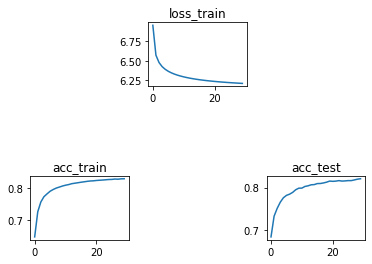

In [672]:
plt.subplot(3,3,2)
plt.plot(range(num_epochs), loss_train)
plt.title('loss_train')
plt.subplot(3,3,7)
plt.plot(range(num_epochs), acc_train)
plt.title('acc_train')
plt.subplot(3,3,9)
plt.plot(range(num_epochs), acc_test)
plt.title('acc_test')

Pullover
Pullover


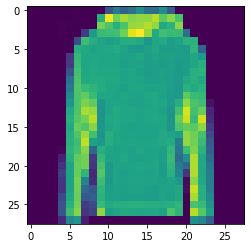

In [680]:
test_num = 10
test_image = torch.utils.data.DataLoader(mnist_test, batch_size=test_num, shuffle=True, 
num_workers=num_workers)
label = mnist_test.classes
for X, y in test_image:
    print(label[y[0]])
    print(label[net(X).argmax(dim=1)[0]])
    plt.imshow(X[0].view(28, 28))
    break